In [1]:
# The following program fits the data for our model using actualcomparison data set. 
# we try to fit the data into our one protein species model
# the fitting works well for the case where protease is at steadystate

In [3]:
import numpy as np
# We are using #3c from actualcomparision
data_x = np.array([0,20,40,60,80,100,120,140,160,180])
data_y = np.array([0.007684816,0.026903985,0.318041772,0.603883329,
                 0.778755759,0.897653379,0.978326541,0.994102523,0.985756947,1])
data_3c = np.array([0.005734412,0.021740445,0.219150912,0.471201795,0.664563631,0.803649288,0.921761874,0.964511375,0.980587616,1])
data_3a = np.array([0.005565952,0.034130264,0.318545682,0.581237081,0.764114792,0.884319561,0.925292138,0.982271605,1,0.980822705])
data_3b = np.array([0.009441574,0.022154543,0.18415351,0.423867609,0.654994832,0.797862981,0.88450925,0.951453697,0.99814368,1])
data_3e = np.array([0.004435785,0.016026941,0.200375598,0.451457754,0.644846274,0.789966614,0.88291191,0.949267901,0.994814785,1])
datas = [data_3c,data_3a,data_3b,data_3e]

[[Fit Statistics]]
    # function evals   = 47
    # data points      = 10
    # variables        = 3
    chi-square         = 1262096.297
    reduced chi-square = 180299.471
    Akaike info crit   = 123.457
    Bayesian info crit = 124.365
[[Variables]]
    x0:   0.22666294 +/- 191.9571 (84688.37%) (init= 10.45642)
    a:    9329.35767 +/- 9.68e+05 (10371.66%) (init= 4)
    b:    0.92573609 +/- 0.641924 (69.34%) (init= 0.02)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, b)                      = -0.990 
    C(x0, a)                     = -0.453 
    C(x0, b)                     =  0.434 
None


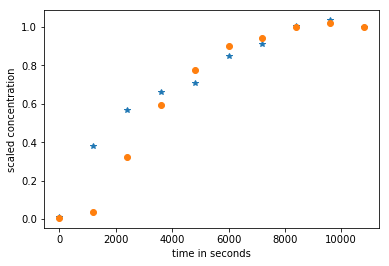

[[Fit Statistics]]
    # function evals   = 110
    # data points      = 10
    # variables        = 3
    chi-square         = 681884.167
    reduced chi-square = 97412.024
    Akaike info crit   = 117.300
    Bayesian info crit = 118.208
[[Variables]]
    x0:   0.00593925 +/- 81.16702 (1366619.07%) (init= 10.86029)
    a:    27828.5912 +/- 2.51e+04 (90.11%) (init= 4)
    b:    0.51885582 +/- 0.090810 (17.50%) (init= 0.02)
[[Correlations]] (unreported correlations are <  0.100)
    C(x0, a)                     = -0.721 
    C(a, b)                      = -0.555 
    C(x0, b)                     =  0.130 
None


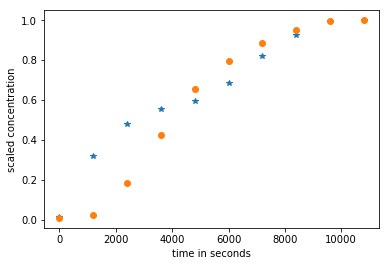

[[Fit Statistics]]
    # function evals   = 52
    # data points      = 10
    # variables        = 3
    chi-square         = 3550554.377
    reduced chi-square = 507222.054
    Akaike info crit   = 133.800
    Bayesian info crit = 134.708
[[Variables]]
    x0:   0.02241451 +/- 702.8865 (3135854.28%) (init= 14.43074)
    a:    15584.6343 +/- 1.26e+04 (80.60%) (init= 4)
    b:    0.99994288 +/- 0.206502 (20.65%) (init= 0.02)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, b)                      = -0.669 
    C(x0, a)                     =  0.117 
None


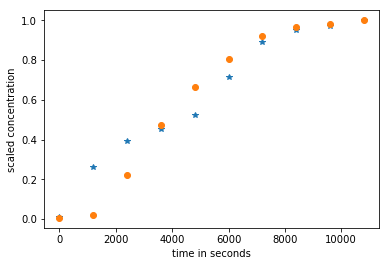

[[Fit Statistics]]
    # function evals   = 74
    # data points      = 10
    # variables        = 3
    chi-square         = 8368620.583
    reduced chi-square = 1195517.226
    Akaike info crit   = 142.374
    Bayesian info crit = 143.282
[[Variables]]
    x0:   0.02180633 +/- 448.5129 (2056801.28%) (init= 13.59846)
    a:    1378.84722 +/- 4.84e+05 (35111.22%) (init= 4)
    b:    0.99999997 +/- 4.818389 (481.84%) (init= 0.02)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, b)                      = -0.999 
    C(x0, b)                     =  0.254 
    C(x0, a)                     = -0.253 
None


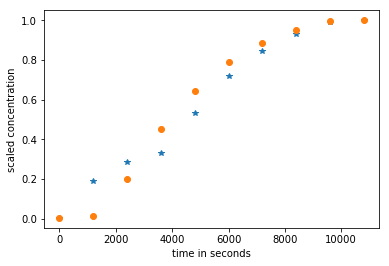

In [126]:
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint
import numpy as np

def f(X,t, ps): 

    degradation_dynamics_n  =  .3*(11.3 / 60 + np.log(2)/1200) * X / ps['a'].value
    degradation_dynamics_d  = 1 +  X / ps['a'].value
    retroactivity_n         = (\
                                   1 +
                                   X / ps['a'].value\
                                   - X / ps['a'].value\
                              ) *\
                              .3/ ps['a'].value 
    
    retroactivity_d         = (1+np.sum ( X / ps['a'].value))**2
    dXdt    =   ( ps['b'].value - degradation_dynamics_n / degradation_dynamics_d - np.log(2)/1200 * X ) /\
                (1+ retroactivity_n / retroactivity_d)
    return dXdt

def g(t, x0, ps):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
 
    x = odeint(f, x0, t, args=(ps,))
    
    return x

def residual(ps, t, data):

    x0 = ps['x0'].value
    
    model = g(t, x0, ps)
    model = np.ravel(model)

    return abs((model - data))

t = np.array([0,20,40,60,80,100,120,140,160,180])
t = 60 * t

data = np.array([0.007684816,0.026903985,0.318041772,0.603883329,
                 0.778755759,0.897653379,0.978326541,0.994102523,0.985756947,1])
# set parameters incluing bounds

results = dict()
# fit model and find predicted values
i = 0
for d in data_unscaled:
    params = Parameters()
    params.add('x0', d[0], min=0)
    params.add('a', value= 4, min=1)
    params.add('b', value= .02, min=0, max =1)
 
    result = minimize(residual, params, args=( t,d), method='leastsq')
  
    final = d + result.residual.reshape(data.shape)
    
    final = final/final[9]
#plt.plot(t,final)
#plot data and fitted curves
    results[i] = result.params
    i = i + 1
    #plt.plot(t,residual(result.params,t,data)+data,'r')
    plt.plot(t, final,'*');
    
    plt.plot(t,d/d[9],'o')
    plt.xlabel('time in seconds')
    plt.ylabel('scaled concentration')
    print(report_fit(result))
    plt.show()

In [ ]:
# The following is the case for simultaneous induction 

In [24]:
data_3c_unscaled = np.array([
14.43074038,
54.71018562,
551.4968474,
1185.787007,
1672.385222,
2022.396548,
2319.628797,
2427.208616,
2467.664737,
2516.516319])

In [25]:
data_3a_unscaled = np.array([
10.45642219,
64.11849239,
598.432776,
1091.93544,
1435.49689,
1661.31842,
1738.291156,
1845.335084,
1878.640362,
1842.613122])

In [26]:
data_3b_unscaled = np.array([
10.86028619,
25.48353404,
211.8248257,
487.5588974,
753.4158107,
917.7516454,
1017.417576,
1094.421244,
1148.126967,
1150.262222])

In [27]:
data_3e_unscaled = np.array([
13.59845923,
49.13260814,
614.2766534,
1384.000655,
1976.857541,
2421.742234,
2706.677756,
2910.10041,
3049.730127,
3065.626056])

In [28]:
data_unscaled = [data_3a_unscaled, data_3b_unscaled,data_3c_unscaled,data_3e_unscaled]

In [16]:
data_no_tag = np.array([
97.56359065,
177.3598439,
1191.582814,
3055.170501,
4935.753995,
6734.532566,
8397.505669,
10311.95787,
11150.45461,
11433.73542,
11095.39906,
10367.62629,
10691.90816,
10530.65819,
10196.41362,
9889.022493])
    

[[Fit Statistics]]
    # function evals   = 1458
    # data points      = 16
    # variables        = 2
    chi-square         = 1154392194.799
    reduced chi-square = 82456585.343
    Akaike info crit   = 293.508
    Bayesian info crit = 295.053
[[Variables]]
    x0:   1148.07392 +/- 7.97e+03 (693.87%) (init= 97.56359)
    k:    5.2096e-08 +/- 11.10716 (21320549059.69%) (init= 0.02)
[[Correlations]] (unreported correlations are <  0.100)
    C(x0, k)                     = -0.160 
None


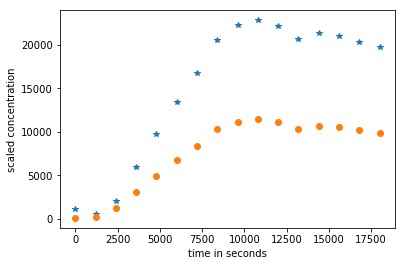

In [29]:
def simultaneous(X,t, ps):
    degradation_dynamics_n  =  .3*(11.3 / 60 + np.log(2)/1200) * X[0] / ps['a'].value
    degradation_dynamics_d  = 1 +  X[0] / ps['a'].value
    retroactivity_n         = (\
                                   1 +
                                   X[0] / ps['a'].value\
                                   - X[0] / ps['a'].value\
                              ) *\
                              .3/ ps['a'].value 
    
    retroactivity_d         = (1+np.sum ( X[0] / ps['a'].value))**2
    dXdt[0]    =   ( ps['b'].value - degradation_dynamics_n / degradation_dynamics_d - np.log(2)/1200 * X[0] ) /\
                (1+ retroactivity_n / retroactivity_d)
    dXdt[1]    = ps['protease_production'] - X[1]*ps['protease_dilution']
    return dXdt

def simultaneous_integration(t, x0, ps):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
 
    x = odeint(f, x0, t, args=(ps,))
    
    return x


def residual(ps, t, data):

    x0 = ps['x0'].value
    
    model = g(t, x0, ps)
    model = np.ravel(model)

    return abs((model - data))

[[Fit Statistics]]
    # function evals   = 632
    # data points      = 16
    # variables        = 2
    chi-square         = 1154384768.004
    reduced chi-square = 82456054.857
    Akaike info crit   = 293.508
    Bayesian info crit = 295.053
[[Variables]]
    x0:   1191.61352 +/- 7.97e+03 (668.54%) (init= 97.56359)
    k:    1.9858e-09 +/- 5.242661 (264005966173.76%) (init= 0.1)
[[Correlations]] (unreported correlations are <  0.100)
    C(x0, k)                     = -0.160 
None


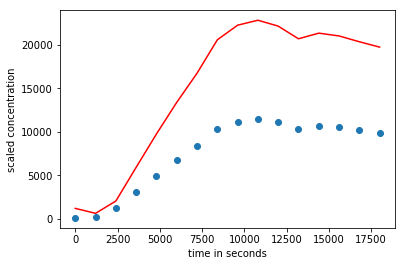

In [56]:

params = Parameters()
params.add('x0', data_no_tag[0], min=0)
params.add('k', value= .1, min = 0, max =1 )

result = minimize(residual, params, args=( t,data_no_tag), method='leastsq')
  
final = data_no_tag+ result.residual.reshape(data_no_tag.shape)
    
final = final
#plt.plot(t,final)
#plot data and fitted curves
results[i] = result.params
i = i + 1
plt.plot(t,residual(result.params,t,data_no_tag)+data_no_tag,'r')
#plt.plot(t, final,'*');

plt.plot(t,data_no_tag,'o')
plt.xlabel('time in seconds')
plt.ylabel('scaled concentration')
print(report_fit(result))
plt.show()